<a href="https://colab.research.google.com/github/ajeeshnadh/DSA_Projects/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_excel('/content/tip-amount.xlsx')
data.head()

,Meal,Observed total bill(xi),Observed tip amount(yi)
0,1,34,5
1,2,108,17
2,3,64,11
3,4,88,8
4,5,99,14


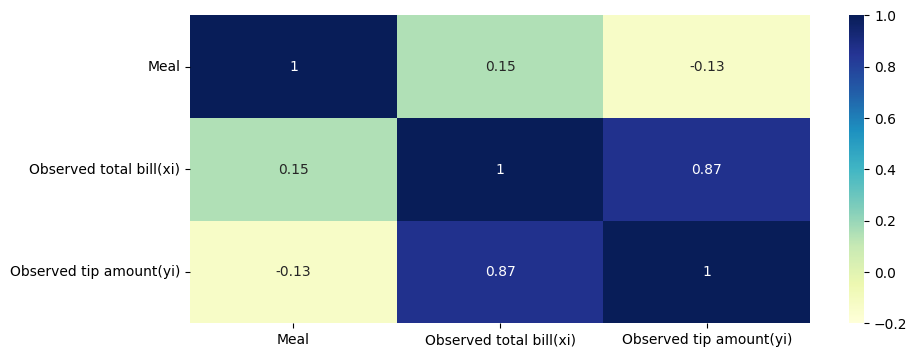

In [ ]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=-.2,vmax=1,annot=True,cmap='YlGnBu')
plt.show()

In [ ]:
y = data['Observed tip amount(yi)']
X = data.drop(['Observed tip amount(yi)'],axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)


from sklearn import linear_model
lr= linear_model.LinearRegression()

model = lr.fit(X_train, y_train)

predictions= model.predict(X_test)

X_test


,Meal,Observed total bill(xi)
0,1,34
1,2,108


In [ ]:
predictions

array([ 7.72756456, 15.46875446])

In [ ]:
# use the trained model to predict the tip amount for the new data point

new_data_point = pd.DataFrame({'Meal':[4,7], 'Observed total bill(xi)': [99,150]})
predicted_tip_amount = model.predict(new_data_point)
print(predicted_tip_amount)

[12.67292053 15.98837209]


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE is : \n', mean_squared_error(y_test, predictions))

MSE is : 
 4.892160668179483


In [ ]:
from sklearn.metrics import r2_score
print ('R squared value is: \n', r2_score(y_test, predictions))

R squared value is: 
 0.8641066481061255


In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the local file
df1 = pd.read_csv('/content/sample_data/california_housing_train.csv')
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
df2 = pd.read_csv('/content/sample_data/california_housing_test.csv')
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
df = pd.concat([df1, df2])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

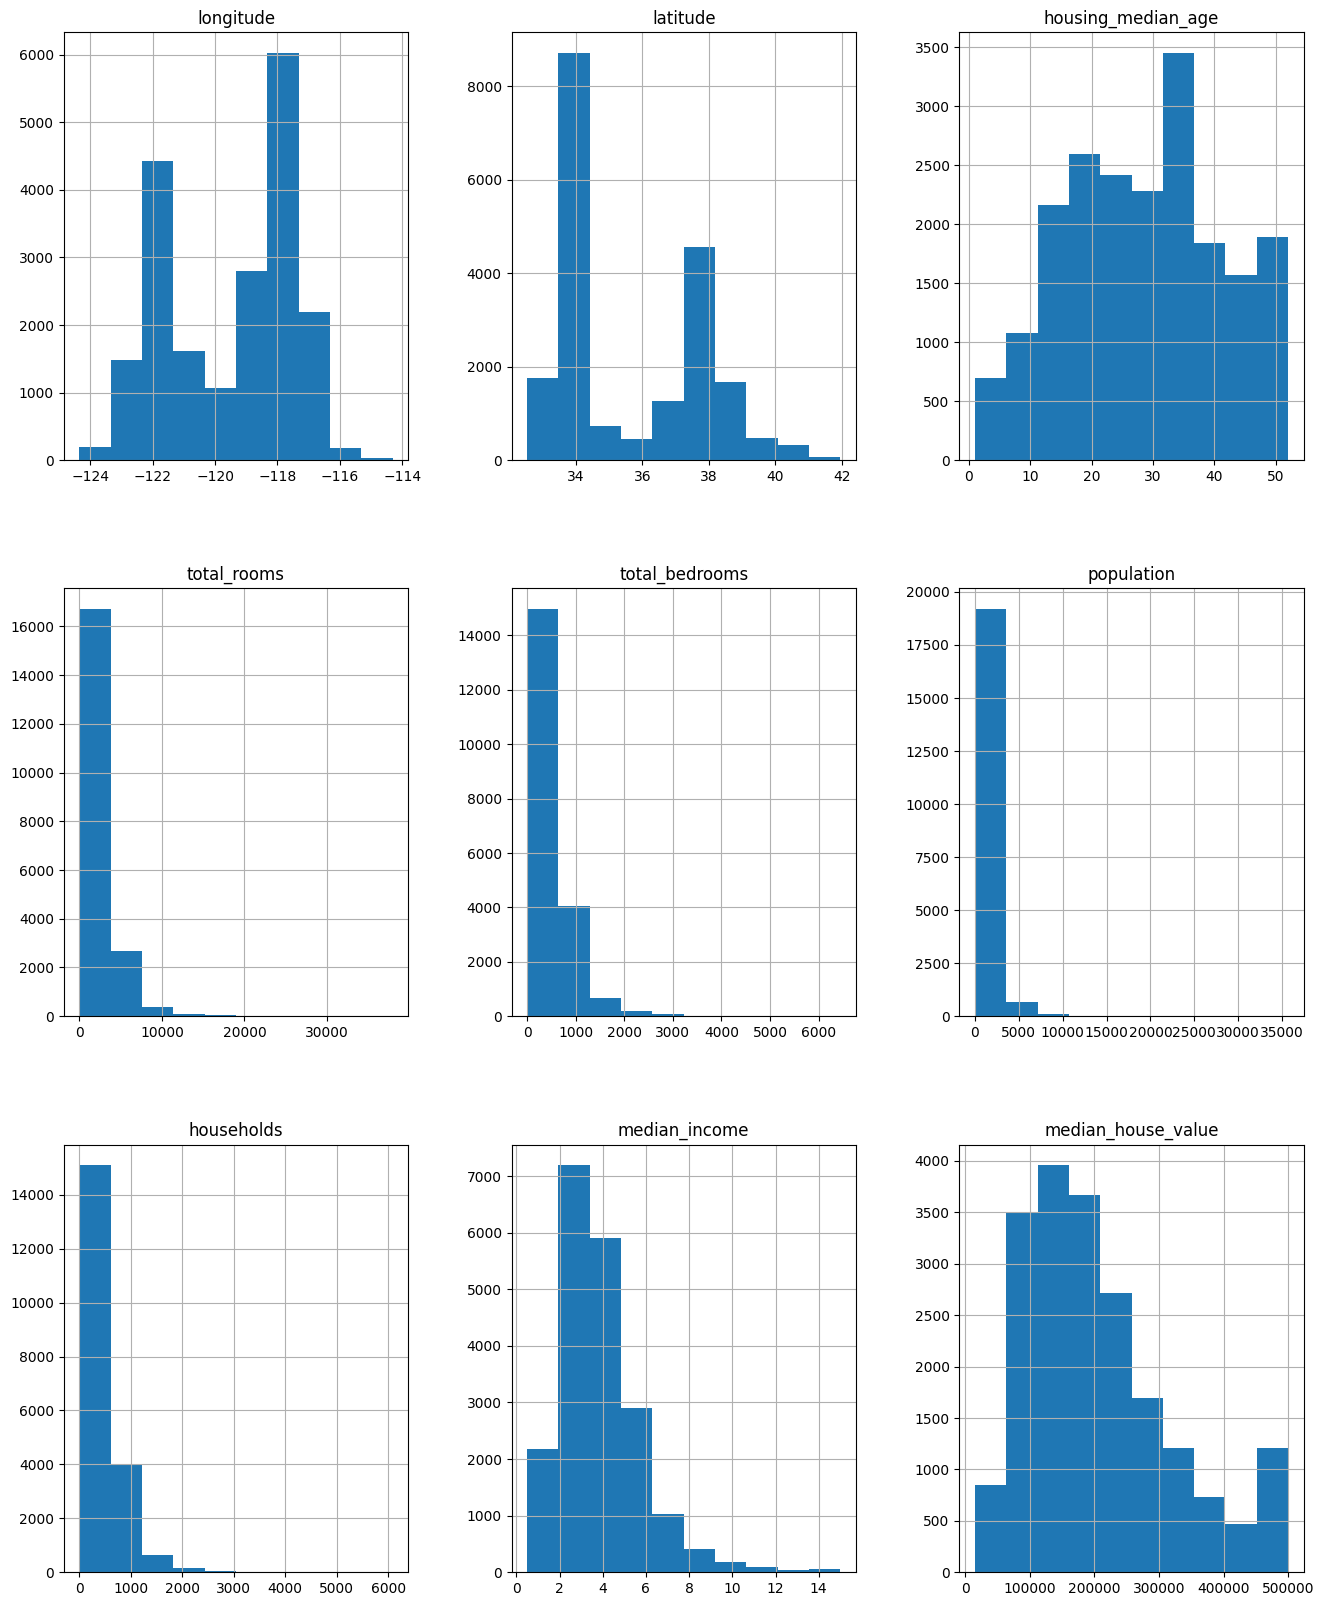

In [ ]:
corr=df.select_dtypes(include="float64")
corr.hist(figsize=(16,20))

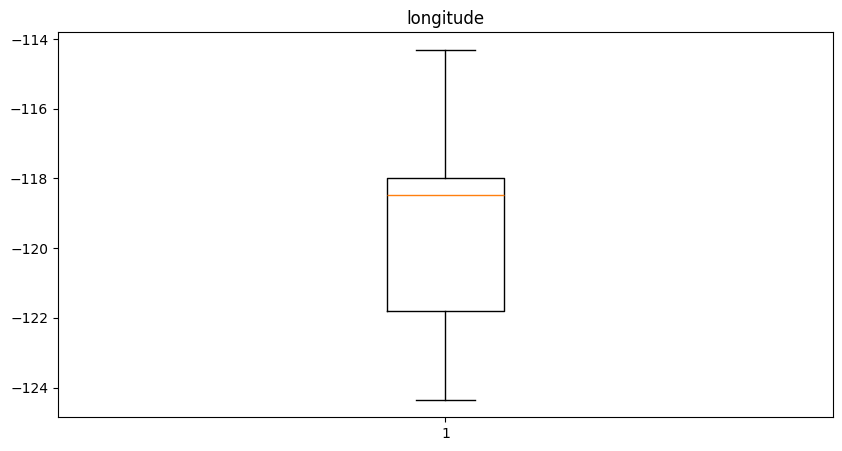

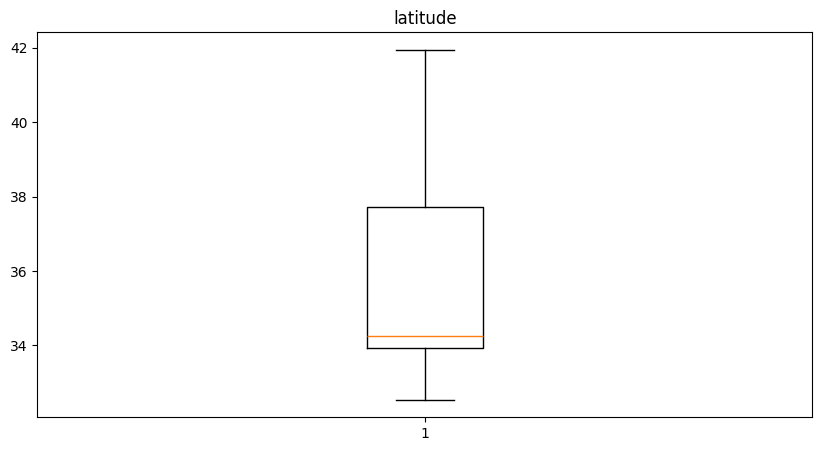

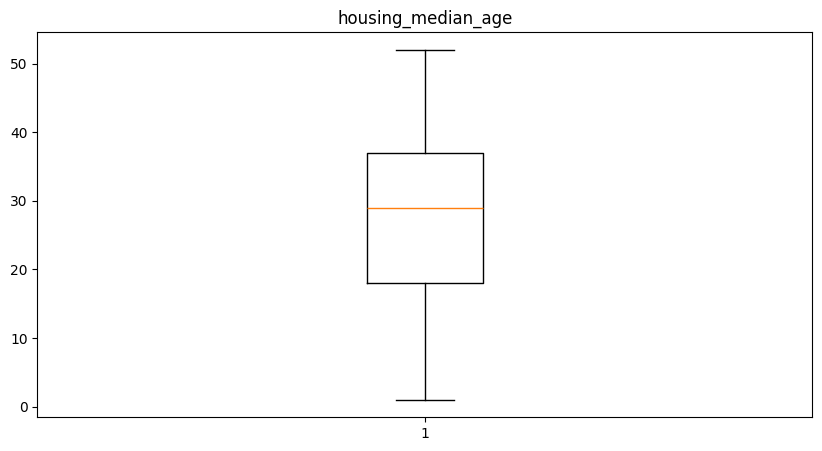

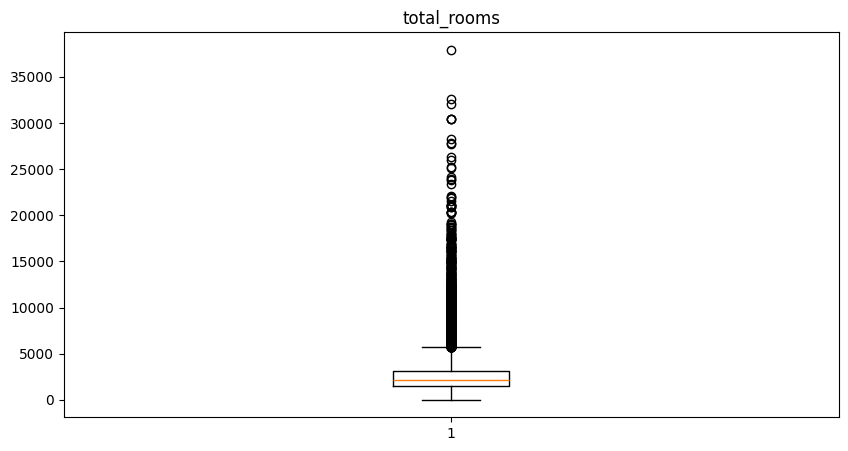

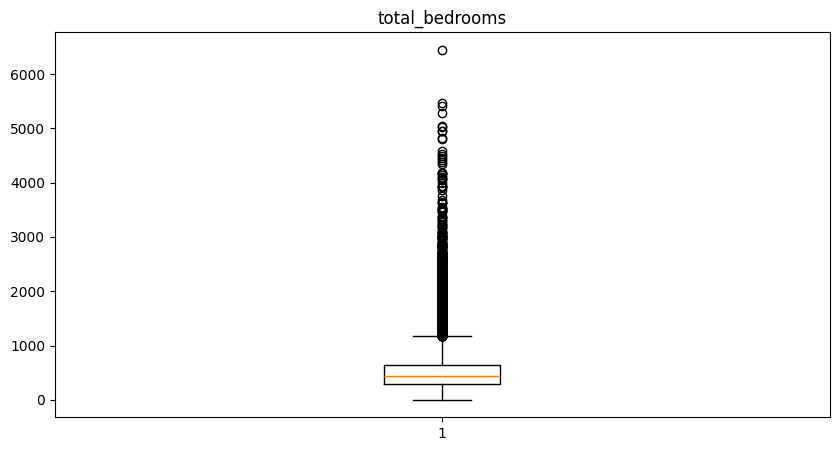

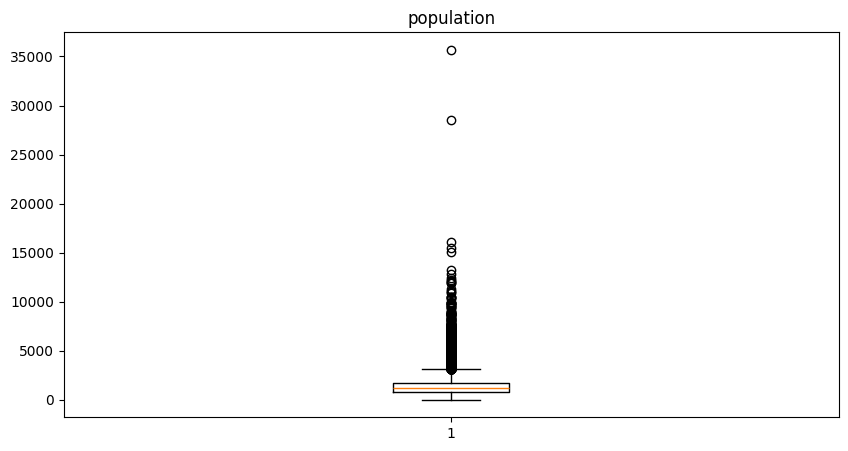

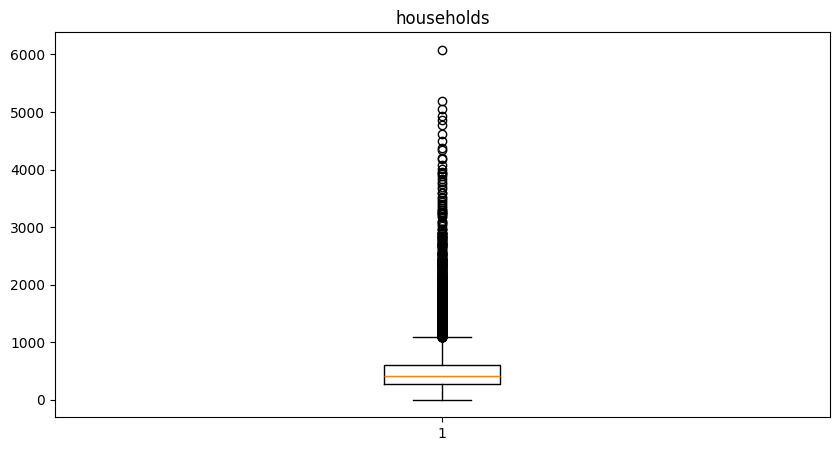

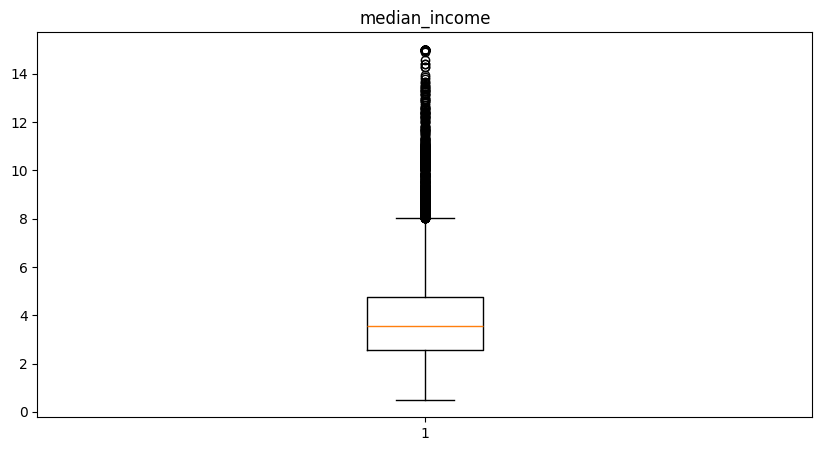

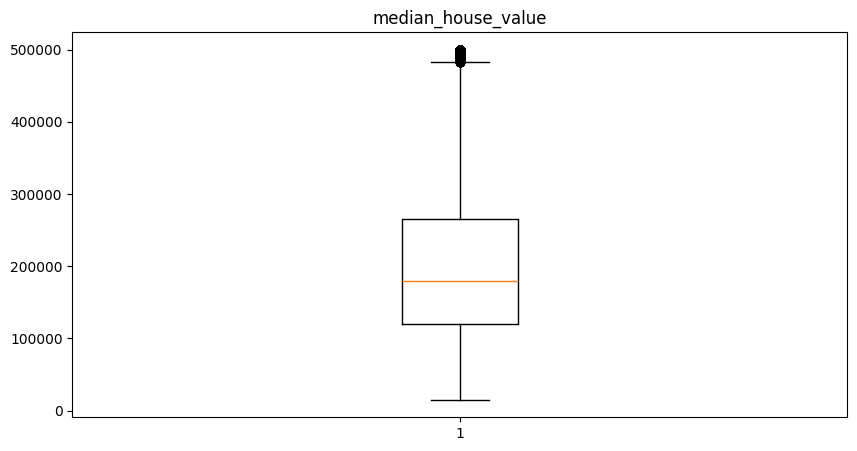

In [ ]:
numcols = df.select_dtypes(include="float64").columns
for i in numcols:
  plt.figure(figsize=(10,5))
  plt.boxplot(df[i])
  plt.title(i)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20000 non-null  float64
 1   latitude            20000 non-null  float64
 2   housing_median_age  20000 non-null  float64
 3   total_rooms         20000 non-null  float64
 4   total_bedrooms      20000 non-null  float64
 5   population          20000 non-null  float64
 6   households          20000 non-null  float64
 7   median_income       20000 non-null  float64
 8   median_house_value  20000 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB



Column: total_rooms
Higher bound: 5696.0
Lower bound: -1096.0
IQR: 1698.0
No. of outliers: 1253


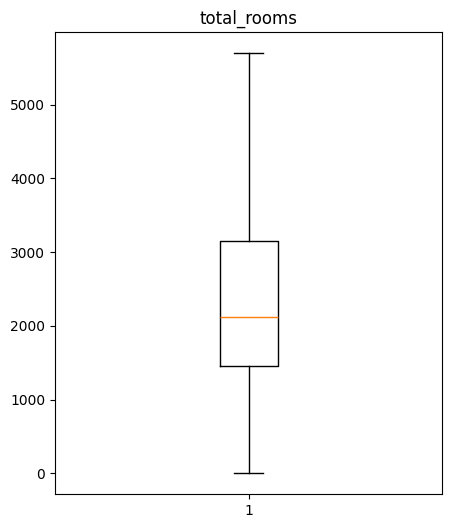


Column: total_bedrooms
Higher bound: 1173.5
Lower bound: -230.5
IQR: 351.0
No. of outliers: 1252


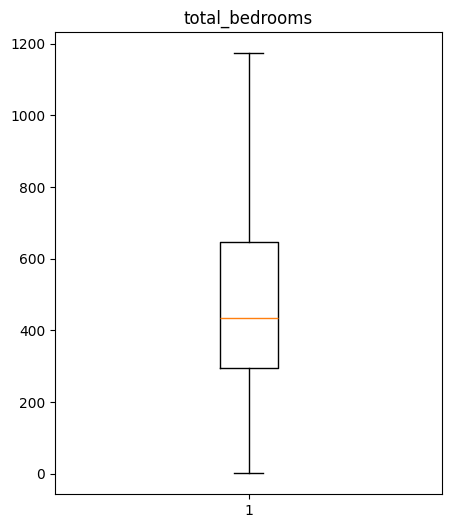


Column: population
Higher bound: 3128.0
Lower bound: -616.0
IQR: 936.0
No. of outliers: 1167


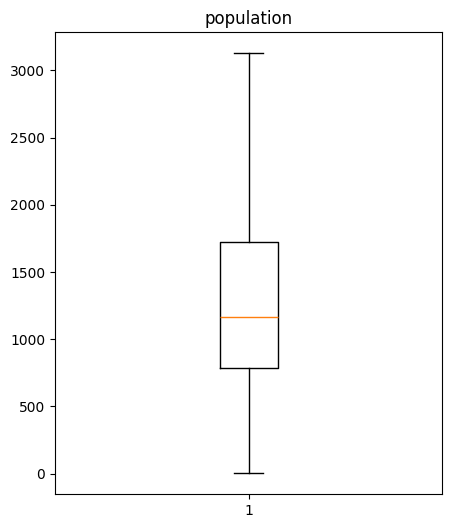


Column: households
Higher bound: 1090.0
Lower bound: -206.0
IQR: 324.0
No. of outliers: 1190


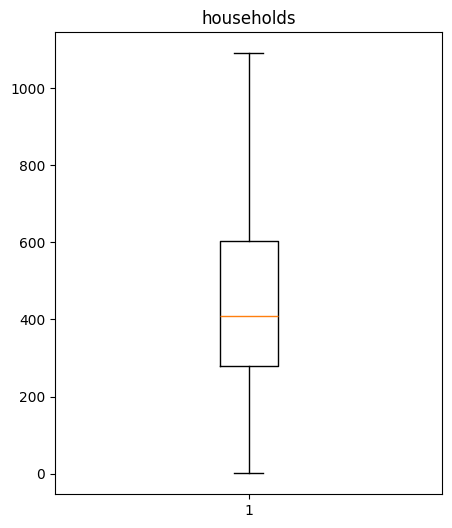


Column: median_income
Higher bound: 8.019562500000001
Lower bound: -0.7117375000000004
IQR: 2.1828250000000002
No. of outliers: 662


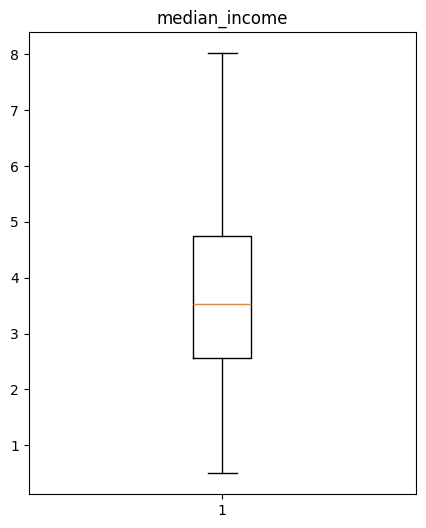


Column: median_house_value
Higher bound: 482800.0
Lower bound: -98000.0
IQR: 145200.0
No. of outliers: 1042


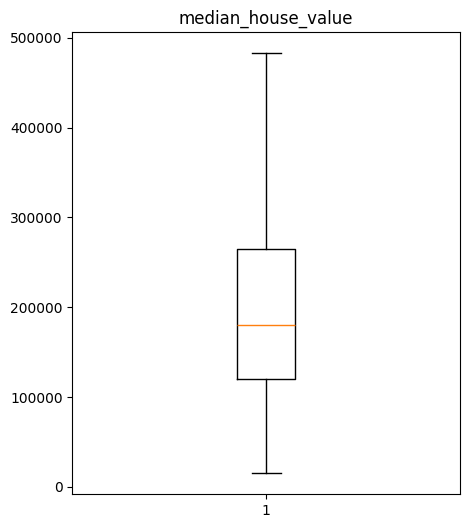

In [ ]:
cols = [
    'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'
]

# Create a MinMaxScaler instance


for col in cols:
    # 1. IQR bounds
    q1 = np.quantile(df[col], 0.25)
    q2 = np.quantile(df[col], 0.75)
    iqr = q2 - q1
    upb = q2 + (1.5 * iqr)
    lwb = q1 - (1.5 * iqr)

    print(f"\nColumn: {col}")
    print("Higher bound:", upb)
    print("Lower bound:", lwb)
    print("IQR:", iqr)

    # 2. Collect outliers
    outliers = [x for x in df[col] if x > upb or x < lwb]
    print("No. of outliers:", len(outliers))

    # 3. Clip values
    df[col] = df[col].clip(lower=lwb, upper=upb)

    # 4. Boxplot (optional, can skip if too many)
    plt.figure(figsize=(5,6))
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()



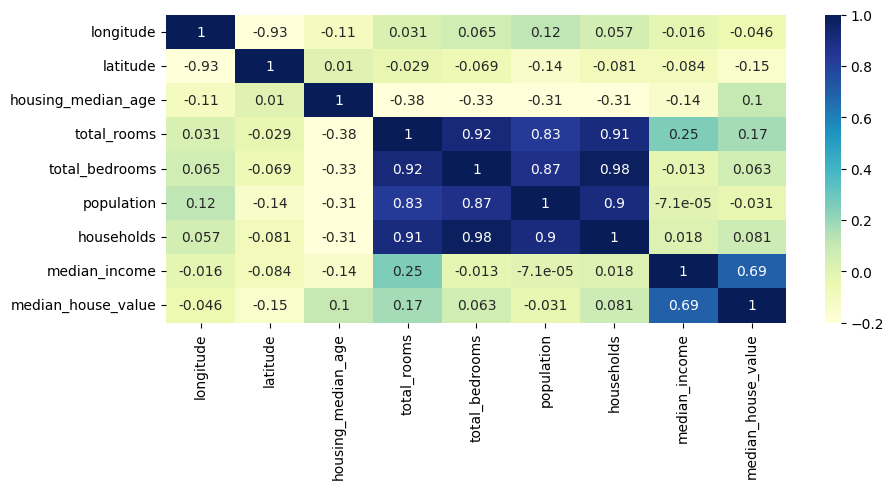

In [ ]:
corrmatrix = df.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=-.2,vmax=1,annot=True,cmap='YlGnBu')
plt.show()